In [7]:
import pickle as pk
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from causalimpact import CausalImpact
import random
mpl.rcParams["mathtext.default"] = "regular"
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.feature as cf

t = pd.date_range(start="1984", end="2014", freq="A-Dec").year

In [1]:
# Open files from analyses.ipynb
lai = xr.open_dataarray("../data/lai_annual_resample_max.nc").rename({
    "latitude":
    "lat",
    "longitude":
    "lon"
})

percent = xr.open_dataset(
    "../data/percent_cover.nc")["__xarray_dataarray_variable__"]
percent = percent.sel(time=slice(
    1984, 2013))  # select to 2013 consistent with LAI and NDVI
# Maximum annual LAI
lai = xr.open_dataarray("../data/lai_annual_resample_max.nc").rename({
    "latitude":
    "lat",
    "longitude":
    "lon"
})

percent["lat"] = lai["lat"]
percent["lon"] = lai["lon"]

ef_region_mean = xr.open_dataarray("../outputs/EF_region_mean.nc")
sh_region_mean = xr.open_dataarray("../outputs/SH_region_mean.nc")
hb_region_mean = xr.open_dataarray("../outputs/HB_region_mean.nc")

lai_region_mean = xr.open_dataarray("../outputs/lai_region_mean.nc")
ef_region_mean_rbeast = pd.read_pickle("../outputs/EF_region_mean_rbeast")
sh_region_mean_rbeast = pd.read_pickle("../outputs/SH_region_mean_rbeast")
hb_region_mean_rbeast = pd.read_pickle("../outputs/HB_region_mean_rbeast")
lai_region_mean_rbeast = pd.read_pickle("../outputs/lai_region_mean_rbeast")

lai_rbeast = pd.read_pickle("../outputs/lai_rbeast")
ef_rbeast = pd.read_pickle("../outputs/EF_rbeast")
sh_rbeast = pd.read_pickle("../outputs/SH_rbeast")
hb_rbeast = pd.read_pickle("../outputs/HB_rbeast")


data_lai = pd.read_pickle("../outputs/data_lai_10percent")
CI_out = pd.read_pickle("../outputs/CI_out")
arr_idx = pd.read_pickle("../outputs/arr_idx_10percent")


# The id of each grid to make easier to find them later
arr = xr.open_dataarray("../data/arr_id.nc")

# Just a simple xarray structure to replace data with other arrays calculated later (for the ease of plotting)
repo = lai.isel(time=0)
t = pd.date_range(start="1984", end="2014", freq="A-Dec").year

NameError: name 'xr' is not defined

Plot regional mean of land cover change (Evergreen forest, shrub, herbs)


In [ ]:
# Extract trend data from the analyses
Y_ef = ef_region_mean_rbeast.trend.Y  # Trend
CI_ef = ef_region_mean_rbeast.trend.CI  # Trend confidence interval
slp_ef = ef_region_mean_rbeast.trend.slp  # Vector of estimate slopes at each t
cpOccPr_ef = ef_region_mean_rbeast.trend.cpOccPr  # Probability of occurance of a change point
slpSgnPosPr_ef = ef_region_mean_rbeast.trend.slpSgnPosPr  # Sign of the slope
cpPr_ef = ef_region_mean_rbeast.trend.cpPr  # Probability associated to a detected change point
cp_ef = ef_region_mean_rbeast.trend.cp[
    cpPr_ef > 0.5]  # Detected change points with probability more than 50%
cpPr_ef = cpPr_ef[cpPr_ef > 0.5]

Y_sh = sh_region_mean_rbeast.trend.Y
CI_sh = sh_region_mean_rbeast.trend.CI
slp_sh = sh_region_mean_rbeast.trend.slp
cpOccPr_sh = sh_region_mean_rbeast.trend.cpOccPr
slpSgnPosPr_sh = sh_region_mean_rbeast.trend.slpSgnPosPr
cpPr_sh = sh_region_mean_rbeast.trend.cpPr
cp_sh = sh_region_mean_rbeast.trend.cp[cpPr_sh > 0.5]
cpPr_sh = cpPr_sh[cpPr_sh > 0.5]

Y_hb = hb_region_mean_rbeast.trend.Y
CI_hb = hb_region_mean_rbeast.trend.CI
slp_hb = hb_region_mean_rbeast.trend.slp
cpOccPr_hb = hb_region_mean_rbeast.trend.cpOccPr
slpSgnPosPr_hb = hb_region_mean_rbeast.trend.slpSgnPosPr
cpPr_hb = hb_region_mean_rbeast.trend.cpPr
cp_hb = hb_region_mean_rbeast.trend.cp[cpPr_hb > 0.5]
cpPr_hb = cpPr_hb[cpPr_hb > 0.5]

Ploting Rbeast on land cover data


In [ ]:
fig, ax = plt.subplots(3,
                       1,
                       figsize=(6, 4),
                       gridspec_kw={
                           "wspace": 0.1,
                           "hspace": 0.05
                       })
twin1 = ax[0].twinx()
twin2 = ax[0].twinx()
twin2.spines.right.set_position(("axes", 1.15))
ax[0].plot(t,
           ef_region_mean.values,
           "-*",
           color="green",
           alpha=0.7,
           label="EF")
ax[0].tick_params(axis="y", colors="green")
ax[0].tick_params(axis="both", which="major", labelsize=12)
ax[0].set_xticks([])

twin1.plot(t,
           sh_region_mean.values,
           "-*",
           color="red",
           alpha=0.7,
           label="Shrub")
twin1.tick_params(axis="y", colors="red")
twin1.tick_params(axis="both", which="major", labelsize=12)

twin2.plot(t,
           hb_region_mean.values,
           "-*",
           color="blue",
           alpha=0.7,
           label="Herb")
twin2.tick_params(axis="y", colors="blue")
twin2.tick_params(axis="both", which="major", labelsize=10)
ax[0].set_ylabel("Percent LC", fontsize=14)
fig.legend(bbox_to_anchor=(0, 0.37, 0.4, 0.5), frameon=False, fontsize=12)

ax[1].plot(t, Y_ef, color="green", linewidth=2)
ax[1].fill_between(t, CI_ef[:, 0], CI_ef[:, 1], color="green", alpha=0.2)
ax[1].set_xticklabels([])
ax[1].set_ylabel("Trend", fontsize=14)
ax[1].set_ylim([np.min(ef_region_mean.values), np.max(ef_region_mean.values)])
ax[1].vlines(cp_ef,
             0,
             np.max(ef_region_mean.values),
             color="green",
             linestyle="--")
ax[1].tick_params(axis="both", which="major", labelsize=12)
ax[1].vlines(cp_ef,
             0,
             np.max(ef_region_mean.values),
             color="green",
             linestyle="-")
ax[1].vlines(cp_sh,
             0,
             np.max(ef_region_mean.values),
             color="red",
             linestyle="--")
ax[1].vlines(cp_hb,
             0,
             np.max(ef_region_mean.values),
             color="blue",
             linestyle="--")
ax[1].tick_params(axis="both", which="major", labelsize=12)
ax[1].tick_params(axis="y", colors="green")
ax[1].set_xticks([])

ax02 = ax[1].twinx()
ax02.plot(t, Y_sh, color="red", linewidth=2)
ax02.fill_between(t, CI_sh[:, 0], CI_sh[:, 1], color="red", alpha=0.2)
ax02.tick_params(axis="both", which="major", labelsize=12)
ax02.tick_params(axis="y", colors="red")

ax03 = ax[1].twinx()
ax03.spines.right.set_position(("axes", 1.15))
ax03.plot(t, Y_hb, color="blue", linewidth=2)
ax03.fill_between(t, CI_hb[:, 0], CI_hb[:, 1], color="red", alpha=0.2)
ax03.tick_params(axis="both", which="major", labelsize=10)
ax03.tick_params(axis="y", colors="blue")

ax[2].plot(t, cpOccPr_ef, linewidth=2, color="green")
ax[2].set_ylabel("Prob", fontsize=14)
ax[2].set_ylim([0, np.max(cpOccPr_ef) + 0.1])
ax[2].tick_params(axis="both", which="major", labelsize=12)
ax[2].fill_between(t, cpOccPr_ef, color="green", alpha=0.2)
ax[2].tick_params(axis="y", colors="green")

ax04 = ax[2].twinx()
ax04.plot(t, cpOccPr_sh, linewidth=2, color="red")
ax04.fill_between(t, cpOccPr_sh, color="red", alpha=0.2)
ax04.tick_params(axis="both", which="major", labelsize=12)
ax04.tick_params(axis="y", colors="red")

ax05 = ax[2].twinx()
ax05.spines.right.set_position(("axes", 1.15))
ax05.plot(t, cpOccPr_hb, linewidth=2, color="blue")
ax05.fill_between(t, cpOccPr_hb, color="blue", alpha=0.2)
ax05.tick_params(axis="both", which="major", labelsize=12)
ax05.tick_params(axis="y", colors="blue")

ax[2].vlines(cp_ef, 0, np.max(cpOccPr_ef) + 0.1, color="green", linestyle="-")
ax[2].vlines(cp_sh, 0, np.max(cpOccPr_sh) + 0.1, color="red", linestyle="--")
ax[2].vlines(cp_hb, 0, np.max(cpOccPr_hb) + 0.1, color="blue", linestyle="--")
fig.align_ylabels()
plt.savefig("../manuscript/figures/regional_mean_LC_rbeast.png",
            bbox_inches="tight",
            pad_inches=0.1)

In [ ]:
Y_lai = lai_region_mean_rbeast.trend.Y
CI_lai = lai_region_mean_rbeast.trend.CI
slp_lai = lai_region_mean_rbeast.trend.slp
cpOccPr_lai = lai_region_mean_rbeast.trend.cpOccPr
slpSgnPosPr_lai = lai_region_mean_rbeast.trend.slpSgnPosPr
cp_lai = lai_region_mean_rbeast.trend.cp[0]
cpPr_lai = lai_region_mean_rbeast.trend.cpPr[0]

In [ ]:
df = pd.DataFrame(data=np.array([Y_lai, lai_region_mean.values]).transpose(),
                  index=t)
fig, ax = plt.subplots(3,
                       1,
                       figsize=(6, 4),
                       gridspec_kw={
                           "wspace": 0,
                           "hspace": 0.05
                       })

ax[0].plot(t,
           lai_region_mean.values,
           "-*",
           color="green",
           alpha=0.7,
           label="LAI")
ax[0].set_ylabel("LAI", fontsize=14)
ax[0].tick_params(axis="y", colors="green")
ax[0].tick_params(axis="both", which="major", labelsize=12)
ax[0].set_xticks([])
fig.legend(bbox_to_anchor=(0.35, 0.28, 0.5, 0.5), frameon=False, fontsize=12)

ax[1].plot(t, Y_lai, color="green", linewidth=2)
ax[1].fill_between(t, CI_lai[:, 0], CI_lai[:, 1], color="green", alpha=0.2)
ax[1].set_xticklabels([])
ax[1].set_ylabel("Trend", fontsize=14)
ax[1].set_ylim(
    [np.min(lai_region_mean.values),
     np.max(lai_region_mean.values)])
ax[1].vlines(cp_lai,
             0,
             np.max(lai_region_mean.values),
             color="green",
             linestyle="--")
ax[1].tick_params(axis="both", which="major", labelsize=12)
ax[1].vlines(cp_lai,
             0,
             np.max(lai_region_mean.values),
             color="k",
             linestyle="--")
ax[1].tick_params(axis="both", which="major", labelsize=12)
ax[1].set_xticks([])
ax[1].tick_params(axis="y", colors="green")

ax[2].plot(t, cpOccPr_lai, linewidth=2, color="green")
ax[2].set_ylabel("Prob", fontsize=14)
ax[2].set_ylim([0, np.max(cpOccPr_lai) + 0.1])
ax[2].tick_params(axis="both", which="major", labelsize=12)
ax[2].fill_between(t, cpOccPr_lai, color="green", alpha=0.2)
ax[2].vlines(cp_lai, 0, np.max(cpOccPr_lai) + 0.1, color="k", linestyle="--")
ax[2].tick_params(axis="y", colors="green")
ax[1].annotate(
    "Change point:\n 2001",
    xy=(cp_lai, 1.7),
    arrowprops={
        "width": 1,
        "headwidth": 6,
        "headlength": 12,
        "color": "gray"
    },
    horizontalalignment="center",
    fontsize=12,
    xytext=(2010, 1.8),
)
fig.align_ylabels()
plt.savefig("../manuscript/figures/regional_mean_lai_rbeast.png",
            bbox_inches="tight",
            pad_inches=0.1)


In [ ]:
ef_cp = ef_rbeast.trend.cp[0, :, :]
sh_cp = sh_rbeast.trend.cp[0, :, :]
hb_cp = hb_rbeast.trend.cp[0, :, :]
lai_cp = lai_rbeast.trend.cp[0, :, :]

lai_cp = lai.isel(time=0).copy(data=lai_cp)
ef_cp = lai.isel(time=0).copy(data=ef_cp)
sh_cp = lai.isel(time=0).copy(data=sh_cp)
hb_cp = lai.isel(time=0).copy(data=hb_cp)

diff_lai_ef = lai_cp - ef_cp
diff_lai_sh = lai_cp - sh_cp
diff_lai_hb = lai_cp - hb_cp

diff_lai_ef = diff_lai_ef.where((diff_lai_ef > 0) & (diff_lai_ef <= 7))
diff_lai_sh = diff_lai_sh.where((diff_lai_sh > 0) & (diff_lai_sh <= 7))
diff_lai_hb = diff_lai_hb.where((diff_lai_hb > 0) & (diff_lai_hb <= 7))
diff_lai_ef = diff_lai_ef.fillna(0)
diff_lai_sh = diff_lai_sh.fillna(0)
diff_lai_hb = diff_lai_hb.fillna(0)
diff_total = (diff_lai_ef + diff_lai_sh + diff_lai_hb)
diff_total = diff_total.where(diff_total > 0)
# lai_cp_due_lcc = 100 * np.isfinite(diff_total).sum().values / total
# print(
#     "The fraction of LAI change points that have an LC CP in the past 7 years: "
#     + str(lai_cp_due_lcc))


In [ ]:
fig, ax = plt.subplots(1,
                       1,
                       figsize=(3, 3),
                       gridspec_kw={
                           "wspace": 0,
                           "hspace": 0.3
                       })
ncp_lai = lai_rbeast.trend.ncp
tmp_ncp_lai = lai.isel(time=0).copy(data=ncp_lai)
tmp_ncp_lai = tmp_ncp_lai.where(np.isfinite(diff_total))
ncp_lai_no_nan = tmp_ncp_lai.values[np.isfinite(tmp_ncp_lai.values)]

ax.hist(
    ncp_lai_no_nan,
    color='k',
    # weights=np.ones_like(ncp_lai_no_nan) / len(ncp_lai_no_nan),
    alpha=0.6,
)
ax.set_xlabel('Number of CP', fontsize=12)
ax.tick_params(labelsize=10)
plt.savefig("../manuscript/figures/Hist_ncp.png", bbox_inches="tight")

In [ ]:
fig, ax = plt.subplots(1,
                       1,
                       figsize=(3, 3),
                       gridspec_kw={
                           "wspace": 0,
                           "hspace": 0.3
                       })
cp_lai = lai_rbeast.trend.cp[0, :, :]
tmp_cp_lai = lai.isel(time=0).copy(data=cp_lai)
tmp_cp_lai = tmp_cp_lai.where(np.isfinite(diff_total))
cp_lai_no_nan = tmp_cp_lai.values[np.isfinite(tmp_cp_lai.values)]

ax.hist(
    cp_lai_no_nan,
    # weights=np.ones_like(tmp_cp_lai) / len(tmp_cp_lai),
    color='k',
    alpha=0.6)
ax.tick_params(labelsize=10)
plt.savefig("../manuscript/figures/Hist_cp.png", bbox_inches="tight")

In [ ]:
plt.figure(figsize=(5, 5))
gs1 = gridspec.GridSpec(1, 1)
gs1.update(wspace=0.14, hspace=0.1)  # set the spacing between axes.

ncp_lai = lai_rbeast.trend.ncp
tmp_ncp_lai = lai.isel(time=0).copy(data=ncp_lai)
tmp_ncp_lai = tmp_ncp_lai.where(np.isfinite(diff_total))
var_to_plot = [tmp_ncp_lai]
title = ["Number of CP"]
for i in range(len(var_to_plot)):
    ax1 = plt.subplot(gs1[i], projection=ccrs.Orthographic(-80, 40))
    s = var_to_plot[i].plot(
        ax=ax1,
        # subplot_kws=subplot_kws,
        transform=ccrs.PlateCarree(),
        add_labels=False,
        # cmap="magma",
        add_colorbar=False,
        robust=True,
    )
    cbar = plt.colorbar(
        s,
        ax=ax1,
        orientation="horizontal",
        # label=title[i],
        pad=0.12)
    cbar.ax.yaxis.set_offset_position("left")
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.set_title(title[i], size=12)
    p = ax1.gridlines(
        draw_labels=True,
        dms=True,
        x_inline=False,
        y_inline=False,
        color="gray",
        alpha=0.15,
        xlocs=np.arange(-150, -90, 10),
    )

    ax1.set_extent([-110, -150, 54, 78], crs=ccrs.PlateCarree())
    ax1.add_feature(cf.COASTLINE)
    ax1.add_feature(cf.BORDERS)
    p.xlabel_style = {"size": 10}
    p.ylabel_style = {"size": 10, "rotation": -45}
    p.right_labels = False
    p.top_labels = False

    plt.gcf().text(
        0.75,
        0.08,
        "Canada",
        fontsize=12,
        color="k",
        alpha=1,
        transform=ax1.transAxes,
    )
    plt.gcf().text(
        0.04,
        0.55,
        "Alaska",
        fontsize=12,
        color="k",
        alpha=1,
        transform=ax1.transAxes,
    )
plt.savefig("../manuscript/figures/ncp_map_LAI.png", bbox_inches="tight")


In [ ]:
plt.figure(figsize=(5, 5))
gs1 = gridspec.GridSpec(1, 1)
gs1.update(wspace=0.14, hspace=0.1)  # set the spacing between axes.

ac_lai = lai_rbeast.trend.cpAbruptChange[0, :, :]
tmp_ac_lai = lai.isel(time=0).copy(data=ac_lai)
tmp_ac_lai = tmp_ac_lai.where(np.isfinite(diff_total))
var_to_plot = [tmp_ac_lai]
title = ["LAI abrupt change"]
for i in range(len(var_to_plot)):
    ax1 = plt.subplot(gs1[i], projection=ccrs.Orthographic(-80, 40))
    s = var_to_plot[i].plot(
        ax=ax1,
        # subplot_kws=subplot_kws,
        transform=ccrs.PlateCarree(),
        add_labels=False,
        # cmap="magma",
        add_colorbar=False,
        robust=True,
    )
    cbar = plt.colorbar(
        s,
        ax=ax1,
        orientation="horizontal",
        # label=title[i],
        pad=0.12)
    cbar.ax.yaxis.set_offset_position("left")
    cbar.ax.tick_params(labelsize=10)
    cbar.ax.set_title(title[i], size=12)
    p = ax1.gridlines(
        draw_labels=True,
        dms=True,
        x_inline=False,
        y_inline=False,
        color="gray",
        alpha=0.15,
        xlocs=np.arange(-150, -90, 10),
    )

    ax1.set_extent([-110, -150, 54, 78], crs=ccrs.PlateCarree())
    ax1.add_feature(cf.COASTLINE)
    ax1.add_feature(cf.BORDERS)
    p.xlabel_style = {"size": 10}
    p.ylabel_style = {"size": 10, "rotation": -45}
    p.right_labels = False
    p.top_labels = False

    plt.gcf().text(
        0.75,
        0.08,
        "Canada",
        fontsize=12,
        color="k",
        alpha=1,
        transform=ax1.transAxes,
    )
    plt.gcf().text(
        0.04,
        0.55,
        "Alaska",
        fontsize=12,
        color="k",
        alpha=1,
        transform=ax1.transAxes,
    )
plt.savefig("../manuscript/figures/ac_map_LAI.png", bbox_inches="tight")


In [ ]:
fig, ax = plt.subplots(1,
                       1,
                       figsize=(3, 3),
                       gridspec_kw={
                           "wspace": 0,
                           "hspace": 0.3
                       })
tmp_cppr_lai = lai_rbeast.trend.cpPr[0, :, :]
tmp_cppr_lai = lai.isel(time=0).copy(data=tmp_cppr_lai)
tmp_cppr_lai = tmp_cppr_lai.where(np.isfinite(diff_total))
ac_loss = tmp_ac_lai.where(tmp_ac_lai < 0)
ac_gain = tmp_ac_lai.where(tmp_ac_lai > 0)
cppr_loss = tmp_cppr_lai.where(np.isfinite(ac_loss))
cppr_gain = tmp_cppr_lai.where(np.isfinite(ac_gain))

ac_loss_sig = ac_loss.where(cppr_loss > 0.5)
ac_gain_sig = ac_gain.where(cppr_gain > 0.5)
print("Percent loss significant AC:" +
      str(100 * np.isfinite(ac_loss_sig).sum().values /
          np.isfinite(tmp_ac_lai).sum().values))
print("Percent gain AC:" + str(100 * np.isfinite(ac_gain_sig).sum().values /
                               np.isfinite(tmp_ac_lai).sum().values))
ac_loss_sig_no_nan = ac_loss_sig.values[np.isfinite(ac_loss_sig.values)]
ac_gain_sig_no_nan = ac_gain_sig.values[np.isfinite(ac_gain_sig.values)]
ax.boxplot([ac_loss_sig_no_nan, ac_gain_sig_no_nan],
           labels=["Loss LAI", "Gain LAI"],
           showfliers=False,
           widths=0.8)
ax.set_ylabel('Abrubt change', fontsize=12)
ax.tick_params(labelsize=12)
plt.savefig("../manuscript/figures/SI_ac_loss_gain.png", bbox_inches="tight")


In [ ]:
cppr1 = lai_rbeast.trend.ncpPr[1, :, :]
cppr1 = lai.isel(time=0).copy(data=cppr1)
cppr1 = cppr1.where(cppr1 >= 0.5)
sig_cppr1 = np.isfinite(cppr1).sum()

cppr2 = lai_rbeast.trend.ncpPr[2, :, :]
cppr2 = lai.isel(time=0).copy(data=cppr2)
cppr2 = cppr2.where(cppr2 >= 0.5)
sig_cppr2 = np.isfinite(cppr2).sum()
total = np.isfinite(ncp_lai).sum()
print("Percent of pixels with more than 0.5 chance of having one CP is" +
      str(np.round(100 * (sig_cppr1 / total).values)))

print("Percent of pixels with more than 0.5 chance of having two CP is" +
      str(np.round(100 * (sig_cppr2 / total).values)))


In [ ]:
plt.figure(figsize=(9, 12))
gs1 = gridspec.GridSpec(3, 2)
gs1.update(wspace=0.14, hspace=0.1)  # set the spacing between axes.

# ac_lai = lai_rbeast.trend.cpAbruptChange[0, :, :]
# tmp_ac_lai = lai.isel(time=0).copy(data=ac_lai)
# tmp_ac_lai = tmp_ac_lai.where(abs(tmp_ac_lai) > 0.02)
# cpPr_lai = lai_rbeast.trend.cpPr[0, :, :]
# tmp_cpPr_lai = lai.isel(time=0).copy(data=cpPr_lai)
# tmp_cpPr_lai = tmp_cpPr_lai.where(~np.isnan(tmp_ac_lai))

ac_ef = ef_rbeast.trend.cpAbruptChange[0, :, :]
tmp_ac_ef = lai.isel(time=0).copy(data=ac_ef)
tmp_ac_ef = tmp_ac_ef.where(abs(tmp_ac_ef) > 0.02)
cpPr_ef = ef_rbeast.trend.cpPr[0, :, :]
tmp_cpPr_ef = lai.isel(time=0).copy(data=cpPr_ef)
tmp_cpPr_ef = tmp_cpPr_ef.where(~np.isnan(tmp_ac_ef))

ac_sh = sh_rbeast.trend.cpAbruptChange[0, :, :]
tmp_ac_sh = lai.isel(time=0).copy(data=ac_sh)
tmp_ac_sh = tmp_ac_sh.where(abs(tmp_ac_sh) > 0.02)
cpPr_sh = sh_rbeast.trend.cpPr[0, :, :]
tmp_cpPr_sh = lai.isel(time=0).copy(data=cpPr_sh)
tmp_cpPr_sh = tmp_cpPr_sh.where(~np.isnan(tmp_ac_sh))

ac_hb = hb_rbeast.trend.cpAbruptChange[0, :, :]
tmp_ac_hb = lai.isel(time=0).copy(data=ac_hb)
tmp_ac_hb = tmp_ac_hb.where(abs(tmp_ac_hb) > 0.02)
cpPr_hb = hb_rbeast.trend.cpPr[0, :, :]
tmp_cpPr_hb = lai.isel(time=0).copy(data=cpPr_hb)
tmp_cpPr_hb = tmp_cpPr_hb.where(~np.isnan(tmp_ac_hb))

var_to_plot = [
    tmp_ac_ef, tmp_cpPr_ef, tmp_ac_sh, tmp_cpPr_sh, tmp_ac_hb, tmp_cpPr_hb
]
title = ["Abrupt change", "Probability"]
ylabels = [
    "Evergreen Forest", "Evergreen Forest", "Shrub", "Shrub", "Herb", "Herb"
]
for i in range(len(var_to_plot)):
    ax1 = plt.subplot(gs1[i], projection=ccrs.Orthographic(-80, 40))
    s = var_to_plot[i].plot(
        ax=ax1,
        # subplot_kws=subplot_kws,
        transform=ccrs.PlateCarree(),
        add_labels=False,
        # cmap="magma",
        add_colorbar=False,
        robust=True,
    )

    cbar = plt.colorbar(s,
                        ax=ax1,
                        orientation="vertical",
                        pad=0.01,
                        shrink=0.83)
    cbar.ax.yaxis.set_offset_position("left")
    p = ax1.gridlines(
        draw_labels=True,
        dms=True,
        x_inline=False,
        y_inline=False,
        color="gray",
        alpha=0.15,
        # ylocs=np.arange(50, 75, 5),
        xlocs=np.arange(-150, -90, 10),
    )

    ax1.set_extent([-110, -150, 55, 75], crs=ccrs.PlateCarree())

    if i < 2:
        ax1.set_title(title[i], fontsize=9, fontweight="semibold")

    if (i == 0 or i == 2 or i == 4 or i == 6):
        ax1.text(-0.12,
                 0.55,
                 ylabels[i],
                 va='bottom',
                 ha='center',
                 rotation='vertical',
                 fontsize=12,
                 fontweight="bold",
                 rotation_mode='anchor',
                 transform=ax1.transAxes)

    ax1.add_feature(cf.COASTLINE)
    ax1.add_feature(cf.BORDERS)
    p.xlabel_style = {"size": 8}
    p.ylabel_style = {"size": 8, "rotation": -45}
    p.right_labels = False
    p.top_labels = False

    plt.gcf().text(
        0.75,
        0.08,
        "Canada",
        fontsize=12,
        color="k",
        alpha=1,
        transform=ax1.transAxes,
    )
    plt.gcf().text(
        0.04,
        0.55,
        "Alaska",
        fontsize=12,
        color="k",
        alpha=1,
        transform=ax1.transAxes,
    )
plt.savefig("../manuscript/figures/Abrupt_change_map_LC.png",
            bbox_inches="tight")


Find a good example for CI


In [ ]:
idx = 333937
np.argwhere(arr.values==idx)


In [16]:
t2 = pd.date_range(start=pd.datetime(1984, 1, 1), periods=len(t), freq="A")
# m = data_lai[1075]
m = data_lai[0]
imp = IterativeImputer(random_state=0)
imp.fit(m)
X = imp.transform(m)
df_tmp = pd.DataFrame(data=X, index=t2)
pre_priod = ["19841231", "19941231"]
post_priod = ["19951231", "20131231"]
random.seed(2)
ci = CausalImpact(
    df_tmp,
    pre_priod,
    post_priod,
    model_args={
        "fit_method": "hmc",
        "standardize": False,
        # "prior_level_sd": None,
    },
)
print(ci.summary())


/tmp/ipykernel_22479/4166899298.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  t2 = pd.date_range(start=pd.datetime(1984, 1, 1), periods=len(t), freq="A")
2023-07-12 13:45:56.617847: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_fit_with_hmc/sample/InverseGamma/sample/PartitionedCall}}]]
2023-07-12 13:45:56.645816: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INTERNAL: No function library is provided.
	 [[{{node powerInverseGamma_CONSTRUCTED_AT_fit_with_hmc/sample_1/InverseGamma/sample/PartitionedCall}}]]
2023-07-12 13:45:56.664337: I tensorflow/core

Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    1.1                20.9
Prediction (s.d.)         0.87 (0.15)        16.57 (2.79)
95% CI                    [0.62, 1.19]       [11.71, 22.65]

Absolute effect (s.d.)    0.23 (0.15)        4.33 (2.79)
95% CI                    [-0.09, 0.48]      [-1.74, 9.19]

Relative effect (s.d.)    26.16% (16.84%)    26.16% (16.84%)
95% CI                    [-10.53%, 55.46%]  [-10.53%, 55.46%]

Posterior tail-area probability p: 0.09
Posterior prob. of a causal effect: 91.11%

For more details run the command: print(impact.summary('report'))


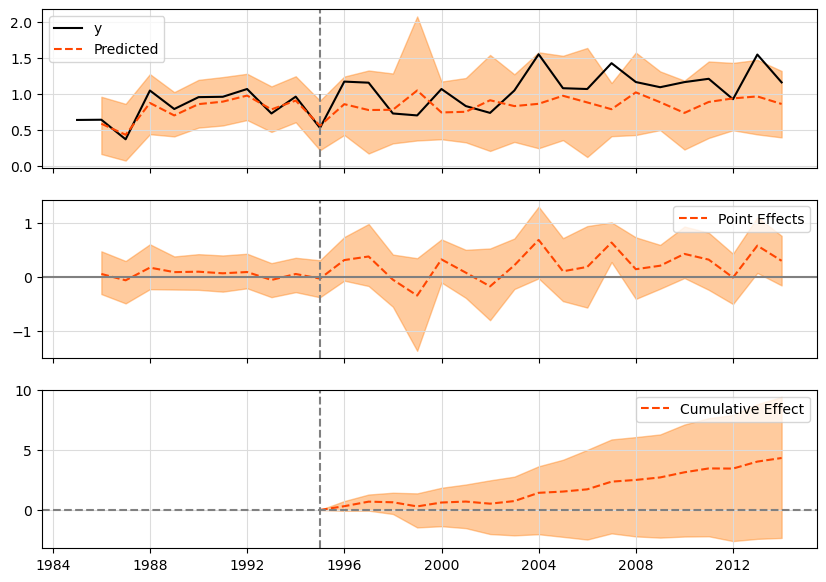

In [18]:
ci.plot()


Below is to test the algorithm. We choose a pixel where there is no LCC and the algorithm could not find any significant prediciton


In [ ]:
# DO NOT REMOVE THIS TEST!!
# m2 = m[:,3:169]
# imp = IterativeImputer(random_state=0)
# imp.fit(m2)
# X = imp.transform(m2)
# df_tmp = pd.DataFrame(data=X, index=t2)
# pre_priod = ["19841231", "19941231"]
# post_priod = ["19951231", "20131231"]
# ci = CausalImpact(
#     df_tmp,
#     pre_priod,
#     post_priod,
#     model_args={
#         "fit_method": "hmc",
#         "standardize": False,
#         # "prior_level_sd": None,
#     },
# )

In [ ]:

fig, ax = plt.subplots(4,
                       1,
                       figsize=(7.5, 6),
                       gridspec_kw={
                           "wspace": 0,
                           "hspace": 0.0
                       })

t_tmp = np.delete(t, 10)
data = ci.data.values[:, 0]

inferences = ci.inferences
pred_mean = inferences["complete_preds_means"].values
pred_upper = inferences["complete_preds_upper"].values
pred_lower = inferences["complete_preds_lower"].values
point_effects_means = inferences["point_effects_means"].values
point_effects_lower = inferences["point_effects_lower"].values
point_effects_upper = inferences["point_effects_upper"].values
post_cum_effects_means = inferences["post_cum_effects_means"].values
post_cum_effects_lower = inferences["post_cum_effects_lower"].values
post_cum_effects_upper = inferences["post_cum_effects_upper"].values

ax[0].plot(t,
           percent.isel(lat=186, lon=863, band=0).values,
           "-*",
           color="green",
           alpha=0.7,
           label="EF")
ax[0].tick_params(axis="y", colors="green")
ax[0].tick_params(axis="both", which="major", labelsize=12)
ax[0].set_xticks([])
ax[0].set_xlim(1983, 2013)

twin1 = ax[0].twinx()
twin2 = ax[0].twinx()
twin1.plot(t,
           percent.isel(lat=186, lon=863, band=2).values,
           "-*",
           color="red",
           alpha=0.7,
           label="Shrub")
twin1.tick_params(axis="y", colors="red")
twin1.tick_params(axis="both", which="major", labelsize=12)
twin2.plot(t,
           percent.isel(lat=186, lon=863, band=4).values,
           "-*",
           color="blue",
           alpha=0.7,
           label="Sparse")
twin2.tick_params(axis="y", colors="blue")
twin2.tick_params(axis="both", which="major", labelsize=12)
twin2.spines.right.set_position(("axes", 1.15))

ax[1].plot(t, data, color="k", linewidth=1)
ax[1].plot(t, pred_mean, color="red", linestyle="--", linewidth=1)
ax[1].fill_between(t, pred_lower, pred_upper, color="red", alpha=0.25)
ax[1].legend(["LAI data", "Prediction"], loc="upper left")
ax[1].set_xlim(1983, 2013)
ax[1].set_ylim(1, 4)
ax[1].tick_params(labelsize=12)

ax[2].plot(t, point_effects_means, color="k", linestyle="--", linewidth=1)
ax[2].fill_between(t,
                   point_effects_lower,
                   point_effects_upper,
                   color="k",
                   alpha=0.25)
ax[2].hlines(0, 1980, 2015, color="k", alpha=0.4)
ax[2].set_xlim(1983, 2013)
ax[2].set_ylim(-0.8, 2.5)
ax[2].legend(["Point effect"], loc="upper left")
ax[2].tick_params(labelsize=12)

ax[3].plot(t, post_cum_effects_means, color="k", linestyle="--", linewidth=1)
ax[3].fill_between(t,
                   post_cum_effects_lower,
                   post_cum_effects_upper,
                   color="k",
                   alpha=0.25)
ax[3].set_xlim(1983, 2013)
ax[3].hlines(0, 1980, 2013, color="k", alpha=0.4)
ax[3].legend(["Cumulative effect"], loc="upper left")
ax[3].tick_params(labelsize=12)

ax[0].axvspan(1993, 1995, alpha=0.5, color='gray')
ax[1].axvspan(1993, 1995, alpha=0.5, color='gray')
ax[2].axvspan(1993, 1995, alpha=0.5, color='gray')
ax[3].axvspan(1993, 1995, alpha=0.5, color='gray')

ax[0].annotate(
    "LCC",
    xy=(1994, 0.7),
    arrowprops={
        "width": 1,
        "headwidth": 5,
        "headlength": 6,
        "color": "gray"
    },
    horizontalalignment="center",
    fontsize=12,
    xytext=(1998, 0.69),
)
fig.legend(bbox_to_anchor=(0, 0.35, 0.9, 0.5), frameon=False, fontsize=12)
plt.savefig("../manuscript/figures/CI_Example.png", bbox_inches="tight")


In [ ]:
# Open the CI_out file which is produced by causaliference_parallel_final.
tmp_f = np.empty((9, len(CI_out)))
tmp_f[:] = np.nan

df = pd.DataFrame(
    tmp_f,
    index=[
        "p_value",
        "actual",
        "predicted",
        "abs_effect",
        "rel_effect",
        "actual_cum",
        "predicted_cum",
        "abs_effect_cum",
        "rel_effect_cum",
    ],
)
# Read data and create a dataframe for some statistical analyses
for i in range(len(CI_out)):
    df.iloc[:, i] = np.array(CI_out[i]).squeeze()

In [ ]:
arr_val = arr.values
repo[:] = np.nan

p_value = np.empty((repo.shape[0], repo.shape[1]))
p_value[:] = np.nan

actual = np.empty((repo.shape[0], repo.shape[1]))
actual[:] = np.nan

predicted = np.empty((repo.shape[0], repo.shape[1]))
predicted[:] = np.nan

abs_effect = np.empty((repo.shape[0], repo.shape[1]))
abs_effect[:] = np.nan

rel_effect = np.empty((repo.shape[0], repo.shape[1]))
rel_effect[:] = np.nan

actual_cum = np.empty((repo.shape[0], repo.shape[1]))
actual_cum[:] = np.nan

predicted_cum = np.empty((repo.shape[0], repo.shape[1]))
predicted_cum[:] = np.nan

abs_effect_cum = np.empty((repo.shape[0], repo.shape[1]))
abs_effect_cum[:] = np.nan

rel_effect_cum = np.empty((repo.shape[0], repo.shape[1]))
rel_effect_cum[:] = np.nan

for i in range(len(arr_idx)):
    I = np.argwhere(arr_val == arr_idx[i])
    p_value[I[0][0], I[0][1]] = df.loc["p_value"][i]
    actual[I[0][0], I[0][1]] = df.loc["actual"][i]
    predicted[I[0][0], I[0][1]] = df.loc["predicted"][i]
    abs_effect[I[0][0], I[0][1]] = df.loc["abs_effect"][i]
    rel_effect[I[0][0], I[0][1]] = df.loc["rel_effect"][i]
    actual_cum[I[0][0], I[0][1]] = df.loc["actual_cum"][i]
    predicted_cum[I[0][0], I[0][1]] = df.loc["predicted_cum"][i]
    abs_effect_cum[I[0][0], I[0][1]] = df.loc["abs_effect_cum"][i]
    rel_effect_cum[I[0][0], I[0][1]] = df.loc["rel_effect_cum"][i]

In [ ]:
CI_p_value = repo.copy(data=p_value)
CI_actual = repo.copy(data=actual)
CI_predicted = repo.copy(data=predicted)
CI_abs_effect = repo.copy(data=abs_effect)
CI_rel_effect = repo.copy(data=rel_effect)

CI_actual_sig = CI_actual.where(CI_p_value <= 0.05)
CI_predicted_sig = CI_predicted.where(CI_p_value <= 0.05)
CI_abs_effect_sig = CI_abs_effect.where(CI_p_value <= 0.05)
CI_rel_effect_sig = CI_rel_effect.where(CI_p_value <= 0.05)

In [ ]:
data_lai[0]

In [ ]:
print("Mean actual post event: " +
      str(np.round(CI_actual_sig.mean().values, 2)) + u"\u00b1" +
      str(np.round(CI_actual_sig.std().values, 2)))
print("Mean predicted post event: " +
      str(np.round(CI_predicted_sig.mean().values, 2)) + u"\u00b1" +
      str(np.round(CI_predicted_sig.std().values, 2)))
print("Mean absolute effect: " +
      str(np.round(CI_abs_effect_sig.mean().values, 2)) + u"\u00b1" +
      str(np.round(CI_abs_effect_sig.std().values, 2)))
print("Mean relative effect: " +
      str(np.round(CI_rel_effect_sig.mean().values, 2)) + u"\u00b1" +
      str(np.round(CI_rel_effect_sig.std().values, 2)))
CI_abs_effect_pos = CI_abs_effect_sig.where(CI_abs_effect_sig>0)

print("Ratio of postive effects:" + str(np.round(100*np.isfinite(CI_abs_effect_pos).sum().values / np.isfinite(CI_abs_effect_sig).sum().values,2)))



In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(6, 6))
gs1 = gridspec.GridSpec(1, 1)
gs1.update(wspace=0.14, hspace=0.1)  # set the spacing between axes.

var_to_plot = [CI_rel_effect_sig * 100]

ax1 = plt.subplot(gs1[0], projection=ccrs.Orthographic(-80, 40))
s = var_to_plot[0].plot(
    # subplot_kws=subplot_kws,
    transform=ccrs.PlateCarree(),
    add_labels=False,
    # cmap="magma",
    add_colorbar=False,
    robust=True,
)
cbar = plt.colorbar(s, ax=ax1, orientation="vertical", pad=0.01, shrink=0.77)
cbar.ax.yaxis.set_offset_position("left")
p = ax1.gridlines(
    draw_labels=True,
    dms=True,
    x_inline=False,
    y_inline=False,
    color="gray",
    alpha=0.15,
    # ylocs=np.arange(50, 75, 5),
    xlocs=np.arange(-150, -90, 10),
)

ax1.set_extent([-110, -150, 55, 75], crs=ccrs.PlateCarree())
ax1.add_feature(cf.COASTLINE)
ax1.add_feature(cf.BORDERS)
p.xlabel_style = {"size": 8}
p.ylabel_style = {"size": 8, "rotation": -45}
p.right_labels = False
p.top_labels = False

# plt.gcf().text(
# 0.75,
# 0.08,
# "Canada",
# fontsize=12,
# color="k",
# alpha=1,
# transform=ax1.transAxes,
# )
# plt.gcf().text(
# 0.04,
# 0.55,
# "Alaska",
# fontsize=12,
# color="k",
# alpha=1,
# transform=ax1.transAxes,
# )

axins = inset_axes(ax1, width=1.3, height=0.9, loc=4, borderpad=2)

axins.hist(np.clip(100 * CI_rel_effect_sig.values.flatten(), -40, 100),
           bins=100,
           density=False,
           color="red",
           alpha=0.5)
# axins.set_xticks(weight = 'bold')
# axins.tick_params(axis='both', which='major', labelsize=12,weight='bold')
# axins.set_xticklabels(axins.get_xticks(), rotation=0, weight='bold', size=8)
# axins.set_yticklabels(axins.get_yticks(), rotation=0, weight='bold', size=8)
plt.savefig("../manuscript/figures/CI_rel_effect.png", bbox_inches="tight")

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.figure(figsize=(6, 6))
gs1 = gridspec.GridSpec(1, 1)
gs1.update(wspace=0.14, hspace=0.1)  # set the spacing between axes.

var_to_plot = [CI_abs_effect_sig]

ax1 = plt.subplot(gs1[0], projection=ccrs.Orthographic(-80, 40))
s = var_to_plot[0].plot(
    # subplot_kws=subplot_kws,
    transform=ccrs.PlateCarree(),
    add_labels=False,
    # cmap="magma",
    add_colorbar=False,
    robust=True,
)
cbar = plt.colorbar(s, ax=ax1, orientation="vertical", pad=0.01, shrink=0.77)
cbar.ax.yaxis.set_offset_position("left")
p = ax1.gridlines(
    draw_labels=True,
    dms=True,
    x_inline=False,
    y_inline=False,
    color="gray",
    alpha=0.15,
    # ylocs=np.arange(50, 75, 5),
    xlocs=np.arange(-150, -90, 10),
)

ax1.set_extent([-110, -150, 55, 75], crs=ccrs.PlateCarree())
ax1.add_feature(cf.COASTLINE)
ax1.add_feature(cf.BORDERS)
p.xlabel_style = {"size": 8}
p.ylabel_style = {"size": 8, "rotation": -45}
p.right_labels = False
p.top_labels = False

# plt.gcf().text(
# 0.75,
# 0.08,
# "Canada",
# fontsize=12,
# color="k",
# alpha=1,
# transform=ax1.transAxes,
# )
# plt.gcf().text(
# 0.04,
# 0.55,
# "Alaska",
# fontsize=12,
# color="k",
# alpha=1,
# transform=ax1.transAxes,
# )

axins = inset_axes(ax1, width=1.3, height=0.9, loc=4, borderpad=2)

axins.hist(np.clip(CI_abs_effect_sig.values.flatten(), -40, 100),
           bins=100,
           density=False,
           color="red",
           alpha=0.5)
# axins.set_xticks(weight = 'bold')
# axins.tick_params(axis='both', which='major', labelsize=12,weight='bold')
# axins.set_xticklabels(axins.get_xticks(), rotation=0, weight='bold', size=8)
# axins.set_yticklabels(axins.get_yticks(), rotation=0, weight='bold', size=8)
plt.savefig("../manuscript/figures/CI_abs_effect.png", bbox_inches="tight")